## **Instruções gerais:**

* Prova individual com consulta
* Colocar o nome e RA no título do arquivo
  * Substituir o nome Prova1-2023-1.ipynb pelo formato **MeuNomeSobrenome-RA.ipynb**
  * **Exemplo:** *AndrewStuartTanenbaum-123456.ipynb*
* Utilizar **apenas** as funções disponíveis em no notebook;
* Cada exercício vale 2,5 pontos
* Enviar o arquivo .ipynb (*com saídas geradas*) e
o respectivo .pdf (do notebook) no moodle

In [ ]:
## Instalação da biblioteca
!pip install binarytree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.2 MB/s eta 0:00:00


### **Exercício 1:**
- Desenvolver uma função em C que verifica se uma uma árvore binária é do tipo binária de busca (ABB).
- Confirmar a saída da função em C a saída da função em python, utilizando o método **is_bst()** da biblioteca binarytree;
- Para isso, a árvore utilizada no código C deverá ser exportada em arquivo ("bTree.txt");
  - A primeira linha do arquivo deve conter **obrigatoriamente** a saída da função (**1**: verdadeiro (ABB) ou **0**: falso (não ABB))
- No código em Python, deverá ser efetuado a leitura do arquivo "bTree.txt", construir a árvore utilizando a função **build2()**;
- Por fim, efetuar a comparação entre a saída da função gerada em C com a saída da função **is_bst()** em python.

#### **Criar a seguinte árvore binária em C**

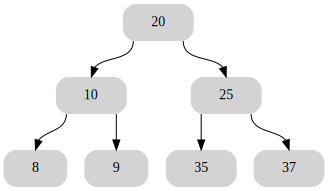

In [ ]:
from binarytree import Node

root = Node(20)
root.left = Node(10)
root.left.left = Node(8)
root.left.right = Node(9)
root.right = Node(25)
root.right.right = Node(37)
root.right.left = Node(35)
root.graphviz()

In [ ]:
%%file AB.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct arv {
  int valor;
  struct arv *esq;
  struct arv *dir;
} Arv;

typedef struct lista {
  Arv* node;
  struct lista *prox;
} Lista;

typedef struct fila {
  Lista* ini;
  Lista* fim;
} Fila;

Arv* removeFila(Fila* pFila){
  if(pFila == NULL)
    return NULL;

  Lista* aux = pFila->ini;
  Arv* node;
  if(aux!=NULL){
    pFila->ini = pFila->ini->prox;
    node = aux->node;
    free(aux);
  }
  //Veirifa se ficou vazio
  if(pFila->ini == NULL)
    pFila->fim = NULL;
  return node;
}

void insereFila(Fila* pFila, Arv* info){
  Lista* novo = (Lista*) malloc(sizeof(Lista));
  novo->node = info;
  novo->prox = NULL;
  if(pFila->ini==NULL){
    pFila->ini = novo;
    pFila->fim = novo;
  }else{
    pFila->fim->prox = novo;
    pFila->fim = novo;
  }
}

Arv* criaFolha(int info){
   Arv* folha = (Arv*) malloc(sizeof(Arv));
   folha->valor = info;
   folha->esq = NULL;
   folha->dir = NULL;
   return folha;
}

Arv* criaNoInterno(int info, Arv* esq, Arv* dir){
   Arv* interno = (Arv*) malloc(sizeof(Arv));
   interno->valor = info;
   interno->esq = esq;
   interno->dir = dir;
   return interno;
}

//////////////////////
//Completar a função//
//////////////////////
int is_bst(Arv* raiz){
    //Deve retornar 1 ou 0
    return 1;
}

// Busca em Largura
void BFS(Arv* raiz, FILE* f){
    Arv* node = NULL;
    Fila* F = (Fila*) malloc(sizeof(Fila));
    F->ini = NULL;
    F->fim = NULL;
    insereFila(F, raiz);

    while (F->ini != NULL) {
        node = removeFila(F);
        if(node != NULL){
          printf("%d, ", node->valor);
          fprintf(f, "%d\n",node->valor);
           if (node->esq!=NULL){
              insereFila(F, node->esq);
           }else{
               insereFila(F, NULL);
           }
           if (node->dir!=NULL){
              insereFila(F, node->dir);
           }else{
              insereFila(F, NULL);
           }
        }else{
          printf("%s, ", "None");
          fprintf(f, "%d\n",0);
        }
    }
}

int main(){

   FILE *fptr;

   Arv *raiz = NULL;

   fptr = fopen("bTree.txt", "w");

    if (fptr != NULL) {
      printf("Arquivo criado com sucesso!\n");
    }
    else {
      printf("Falha na criação do arquivo!!\n");
      return -1;
    }

    //////////////////////////////////////////////////////////
    //                      EDITAR AQUI                     //
    //     Chamada da função que verifica se é uma ABB      //
    //////////////////////////////////////////////////////////
    //Exemplo:
    fprintf(fptr, "%d\n",is_bst(raiz));

    //Função para gerar a árvore binária
    //no arquivo bTree.txt
    BFS(raiz,fptr);
    fclose(fptr);
  return 0;
}


In [ ]:
!gcc AB.c -o ab
!./ab

In [ ]:
## Faz a leitura da arvore gerada em C
# opening the file in read mode

def geraArvore(arquivo, readFirstLine):

  """
    Retorna a lista com a árvore binária do
    arquivo "bTree.txt".

    :param arquivo: string
    :param readFirstLine: bool (True or False)

    :return leitura (list):
    """

  # reading the file
  leitura = []
  firstLine = 0
  with open(arquivo, 'r') as f:
      if readFirstLine:
        firstLine = int(f.readline().strip())
      while True:
          line = f.readline().strip()
          if not line:
              break
          leitura.append(int(line))

  for i in range(0,len(leitura)):
    if leitura[i]==0:
      leitura[i] = None

  print(leitura)
  f.close()
  return leitura,firstLine

In [ ]:
# Gerar a lista com os valores contidos em bTree.txt
# Utilizar a função geraArvore()

## Parâmetros da função:
# >>> Nome do arquivo (String) e,
# >>> um booleano (True ou False) para indicar se
# >>> faz a leitura da primeira linha do arquivo separadamente

## Retorno da função:
# >>> lista com os dados do arquivo e,
# >>> um valor int com o conteúdo da primeira linha do arquivo (se parâmetro for True)



In [ ]:
## Gerar a AB em Python com a biblioteca Binarytree


In [ ]:
## Aplicar a função is_bst() e comparar
## com o valor da primeira linha de "bTree.txt"


### **Exercício 2:**
- Desenvolver uma função em C que verifica a quantidade de nós folhas em uma árvore binára de busca(ABB).
- Para isso, a árvore utilizada no código C deverá ser exportada em arquivo ("bTree.txt");
- Já no código em Python, deverá ser efetuado a leitura do arquivo "bTree.txt" e construir a árvore binária com a função **build2()**;
- Ainda em python, utilizar a função **leaf_count()** para gerar a quantidade de folhas;
- Gravar a quantidade de folhas em um arquivo **"saida.txt"**;
- Enviar o arquivo **"saida.txt"** como argumento para o código ABB.c;
- Devolta ao código C, abrir o arquivo **"saida.txt"** e comparar a saída gerada pela função desenvolvida em C com o valor contido em **saida.txt**;
- Imprimir dentro do código C se os valores são iguais ou diferentes.

#### **Criar a seguinte ABB em C**

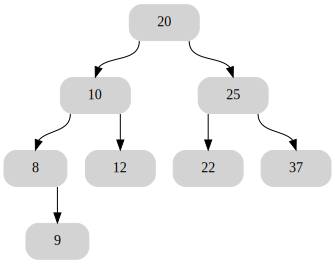

In [ ]:
from binarytree import Node

root = Node(20)
root.left = Node(10)
root.left.left = Node(8)
root.left.left.right = Node(9)
root.left.right = Node(12)
root.right = Node(25)
root.right.right = Node(37)
root.right.left = Node(22)
root.graphviz()

In [ ]:
%%file ABB.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct arv {
  int valor;
  struct arv *esq;
  struct arv *dir;
} Arv;

typedef struct lista {
  Arv* node;
  struct lista *prox;
} Lista;

typedef struct fila {
  Lista* ini;
  Lista* fim;
} Fila;

Arv* removeFila(Fila* pFila){
  if(pFila == NULL)
    return NULL;

  Lista* aux = pFila->ini;
  Arv* node;
  if(aux!=NULL){
    pFila->ini = pFila->ini->prox;
    node = aux->node;
    free(aux);
  }
  //Veirifa se ficou vazio
  if(pFila->ini == NULL)
    pFila->fim = NULL;
  return node;
}

void insereFila(Fila* pFila, Arv* info){
  Lista* novo = (Lista*) malloc(sizeof(Lista));
  novo->node = info;
  novo->prox = NULL;
  if(pFila->ini==NULL){
    pFila->ini = novo;
    pFila->fim = novo;
  }else{
    pFila->fim->prox = novo;
    pFila->fim = novo;
  }
}

Arv *insereArv(Arv *raiz, int info) {
  // Caso base
  if (raiz == NULL) {
    Arv *novo = (Arv *)malloc(sizeof(Arv));
    novo->valor = info;
    novo->esq = NULL;
    novo->dir = NULL;
    return novo;
  } else {
    if (raiz->valor > info) {
      raiz->esq = insereArv(raiz->esq, info);
    } else {
      raiz->dir = insereArv(raiz->dir, info);
    }
    return raiz;
  }
}

//////////////////////
//Completar a função//
//////////////////////
int leaf_count(Arv* raiz){
    //Deve retornar a quantidade de folhas
    return 1;
}

// Busca em Largura
void BFS(Arv* raiz, FILE* f){
    Arv* node = NULL;
    Fila* F = (Fila*) malloc(sizeof(Fila));
    F->ini = NULL;
    F->fim = NULL;
    insereFila(F, raiz);

    while (F->ini != NULL) {
        node = removeFila(F);
        if(node != NULL){
          printf("%d, ", node->valor);
          fprintf(f, "%d\n",node->valor);
           if (node->esq!=NULL){
              insereFila(F, node->esq);
           }else{
               insereFila(F, NULL);
           }
           if (node->dir!=NULL){
              insereFila(F, node->dir);
           }else{
              insereFila(F, NULL);
           }
        }else{
          printf("%s, ", "None");
          fprintf(f, "%d\n",0);
        }
    }
}

int main(int argc, char **argv) {

   FILE *fptr;
   Arv *raiz = NULL;

  if(argc == 1){
    FILE *fptr;
    fptr = fopen("bTree.txt", "w");

    if (fptr != NULL) {
      printf("Arquivo criado com sucesso!\n");
    }
    else {
      printf("Failed to create the file.\n");
      // exit status for OS that an error occurred
      return -1;
    }
    BFS(raiz,fptr);
    fclose(fptr);
  }else{
    fptr = fopen(argv[1], "r");
    int temp;
    if (fptr != NULL) {
      printf("Leitura realizada com sucesso!\n");
      fscanf(fptr, "%d", &temp);
      printf("Conteúdo do arquivo %s: %d\n", argv[1],temp);
    }
    else {
      printf("Falha na leitura do arquivo!!!\n");
      // exit status for OS that an error occurred
      return -1;
    }

    /////////////////////////////////////////////////////////
    //                      EDITAR AQUI                   ///
    //Chamada da função que verifica a quantidade de folhas//
    /////////////////////////////////////////////////////////
    printf("Saída da função: %d\n", leaf_count(raiz));
    printf("Valor do arquivo Python: %d\n", temp);

    fclose(fptr);
  }
  return 0;
}


In [ ]:
!gcc ABB.c -o abb
!./abb

In [ ]:
# Gerar a lista com os valores contidos em bTree.txt
# Utilizar a função geraArvore()

## Parâmetros da função:
# >>> Nome do arquivo (String) e,
# >>> um booleano (True ou False) para indicar se
# >>> faz a leitura da primeira linha do arquivo separadamente

## Retorno da função:
# >>> lista com os dados do arquivo e,
# >>> um valor int com o conteúdo da primeira linha do arquivo (se parâmetro for True)



In [ ]:
## Gerar a ABB em Python com a biblioteca Binarytree


In [ ]:
## Aplicar a função leaf_count() e salvar
## salvar na variável folhas



In [ ]:
## Armazenar o valor de folhas no arquivo "saida.txt"
with open('saida.txt', 'w') as f:
      f.write(str(folhas))
f.close()

In [ ]:
## Rodar novamente o executável "abb" com o arquivo "saida.txt"
